In [17]:
from numpy import linalg as npl 
import scipy 
from scipy import interpolate
import numpy as np 
import matplotlib.pyplot as plt

def convol(a,b):
    return np.fft.ifftshift(np.fft.ifft(np.fft.fft(a)*np.fft.fft(b)))

def H(x):
    return abs(x)

def Hp(x):
    N = len(x)
    Hgrid = x/abs(x**2)
    Hgrid[N//2] = 0 
    return Hgrid

def remove_nan(a):
    nan_a = np.isnan(a)
    non_nan_a = ~ nan_a
    return a[non_nan_a]

def convolution(pi, grid):
    n = pi.shape[0]
    n_padded = 2*n +1
    pi_padded = np.zeros(n_padded)
    pad = (n+1) // 2 
    pi_padded[pad:-pad] = pi
    S = grid[-1] + (grid[1]-grid[0])*(n_padded-n)/2.
    grid_padded = np.linspace(-S, S, n_padded)
    Hgrid = H(grid_padded)
    conv = convol(pi_padded, Hgrid)
    conv = conv[pad:-pad]
    return conv.real

def convolution_prime(pi, grid):
    n = pi.shape[0]
    n_padded = 2*n +1
    pi_padded = np.zeros(n_padded)
    pad = (n+1) // 2 
    pi_padded[pad:-pad] = pi
    S = grid[-1] + (grid[1]-grid[0])*(n_padded-n)/2.
    grid_padded = np.linspace(-S, S, n_padded)
    Hgrid = Hp(grid_padded)
    conv = convol(pi_padded, Hgrid)
    conv = conv[pad:-pad]
    return conv.real

def interp(grid, ky):
    return interpolate.interp1d(grid,ky, fill_value="extrapolate")

def F(p):
    N = len(p)  
    F = 0
    for i in range(N):
        for j in range(N):
            F += H(p[i]-p[j])
    return F/(2*N**2)

def gradF(p): 
    N = len(p)
    grad = np.zeros(N)
    for i in range(N):
        grad[i] = np.sum(remove_nan(Hp(p[i]-p)))
    return grad/(N**2)

def G(p): 
    ky = convolution(pi, grid)
    f = interp(grid,ky)
    return np.sum(f(p))/len(p)

def gradG(p):
    N = len(p)
    ky = convolution_prime(pi, grid)
    f = interp(grid,ky)
    grad = np.zeros(N)
    for i in range(N):
        grad[i] = np.sum(f(p[i]))
    return grad/len(p)

def J(p):
    return F(p) - G(p)

def gradJ(p):
    return gradF(p) - gradG(p)

def Gradient(J,gradJ,h=1e-5, pini = np.zeros(20)): 
    p = np.copy(pini) 
    y = [p] 
    eps = 1e-10 
    itermax = 1000 
    err = 2*eps 
    iter = 0 
    while err>eps and iter<itermax:
        p = p - h*gradJ(p)
        y.append(p) 
        err = np.linalg.norm(gradJ(p)) 
        iter += 1 
    xiter=np.array(y) 
    return p,xiter,iter

In [13]:
N = 67
grid = (np.arange(N)+0.5)/N - 0.5
p = np.linspace(0,1,20)
pi = np.arange(1,N+1)/N
pmin, xiter, iter_ = Gradient(J,gradJ,pini=p)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in true_divide
  


In [14]:
print(pmin)

[-0.03260303  0.02337311  0.0804997   0.1388013   0.19853112  0.26019583
  0.32477259  0.3947471   0.48290495  0.81330677  1.39483806  1.97699966
  2.55741359  3.13813243  3.71889892  4.29965745  4.88037621  5.46101359
  6.04147657  6.62140113]


In [15]:
pi2 = np.zeros(20)
for i in range(20):
    pi2[i] = pi[i]**2 
pmin2, xiter2, iter2 = Gradient(J, gradJ, pini = p)


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in true_divide
  


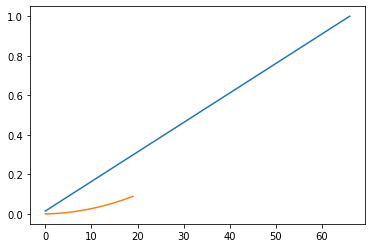